In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
%cd /content/drive/MyDrive/Dataset

/content/drive/MyDrive/Dataset


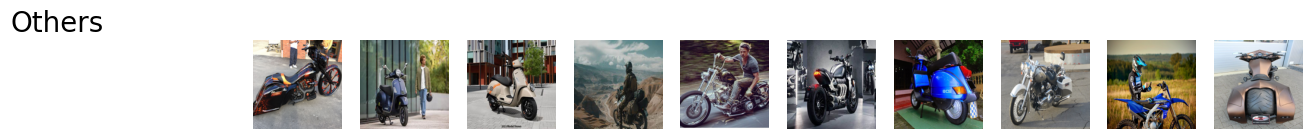

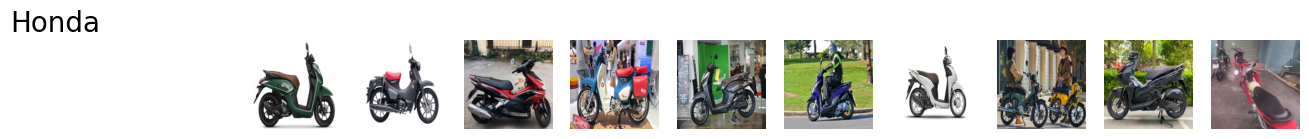

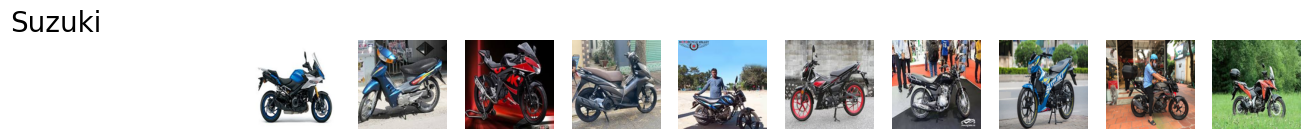

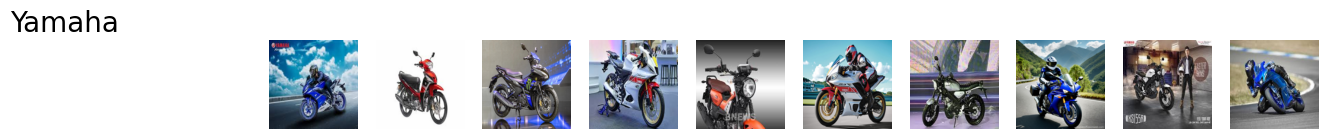

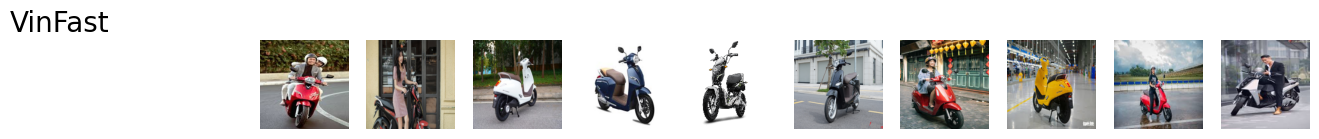

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from PIL import Image
import random

# Constants
IMG_HEIGHT = 150
IMG_WIDTH = 150

# Mapping CategoryID to brand names
CATEGORY_NAMES = {
    0: 'Others',
    1: 'Honda',
    2: 'Suzuki',
    3: 'Yamaha',
    4: 'VinFast'
}

def load_data(csv_file):
    df = pd.read_csv(csv_file)
    return df

def plot_images(data, num_imgs, img_height=IMG_HEIGHT, img_width=IMG_WIDTH):
    categories = data['CategoryID'].unique()
    for category in categories:
        category_data = data[data['CategoryID'] == category]
        image_paths = category_data['ImageFullPath'].tolist()
        random.shuffle(image_paths)

        num_images = min(num_imgs, len(image_paths))
        num_rows = 1  # We only want one row

        plt.figure(figsize=(num_imgs * (img_width / 100), (img_height / 100)))

        selected_image_paths = random.sample(image_paths, num_images)

        for i, img_path in enumerate(selected_image_paths):
            img = Image.open(img_path)
            img = img.resize((img_width, img_height))
            plt.subplot(1, num_images, i + 1)
            plt.imshow(img)
            plt.axis('off')

        plt.suptitle(CATEGORY_NAMES[category], fontsize=20, x=0.1, ha='right')
        plt.subplots_adjust(left=0.2, top=0.85)
        plt.show()

# Load data
csv_file = 'MotocycleDataset-Splits-1-Train.csv'  # Thay đổi đường dẫn này thành tệp CSV muốn xử lý
data = load_data(csv_file)

# Plot images with random number of images per row
NUM_IMGS = 10  # Số lượng ảnh tối đa trên một dòng
plot_images(data, NUM_IMGS)
